In [166]:
import numpy as np
from qiskit import *

# Hadamar's Test
# тест адамара нужен для оценки значения интеграла перекрытия 2 векторов состояния

In [173]:
# первые параметры для состояния 1
theta_1 = np.pi / 3
phi_1 = np.pi / 4
psi_1 = np.array([np.cos(theta_1 / 2), np.exp(1j * phi_1) * np.sin(theta_1 / 2)])

In [174]:
# вторые параметры для состояния 2
theta_2 = np.pi / 6
phi_2 = 3 * np.pi / 4
psi_2 = np.array([np.cos(theta_2 / 2), np.exp(1j * phi_2) * np.sin(theta_2 / 2)])

In [175]:
lam = 2  # lambda

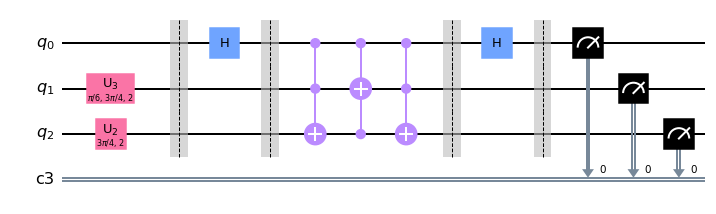

In [170]:
# Создание самой квантовой схемы с 3 кубитами и 1 классичесиким регистром
qr = QuantumRegister(3, name="q")
c3 = ClassicalRegister(1, name="c3")
qc = QuantumCircuit(qr, c3)

# Инициализация
qc.u2(phi_2, lam, 2)
qc.u3(theta_2, phi_2, lam, 1)
qc.barrier()

# Суперпозиция
qc.h(0)
qc.barrier()

# Свап
qc.ccx(0, 1, 2)
qc.ccx(0, 2, 1)
qc.ccx(0, 1, 2)
qc.barrier()

# Сварачивает супер позицию
qc.h(0)
qc.barrier()

# Измерения
qc.measure(0, 0)
qc.measure(1, 0)
qc.measure(2, 0)

# Отрисовка схемы
qc.draw(output='mpl')

# По нашей формуле мы можем просчитать значения
$P_0 = \frac{1 + \left | \left \langle \psi_1|\psi_2 \right \rangle \right | ^ 2}{2}$

In [171]:
bra_ket_inner_product = psi_1.T * psi_2
P_0 = (1 + np.sum(bra_ket_inner_product**2) ** 2) / 2
P_0

(0.7566906754730549-2.573573154054427e-18j)